In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%matplotlib inline

In [21]:
data = pd.read_csv('train.csv',index_col='PassengerId')

In [22]:
data.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [24]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [237]:
data.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                            Name     Sex  \
PassengerId                                                                
1                                        Braund, Mr. Owen Harris    male   
2            Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female   
3                                         Heikkinen, Miss. Laina  female   
4                   Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
5                                       Allen, Mr. William Henry    male   

              Age  SibSp  Parch            Ticket   Fare Cabin Embarked  
PassengerId                                                              
1            22.0      1      0         A/5 21171   7.25   NaN        S  
2            38.0      1      0          PC 17599  71.28   C85        C  
3            26.0      0      0  STON/O2. 3101282   7.92   NaN        S  
4            35.0      1      0            113803  53.10  C123        S  
5            35.0      0      0            373450   8.05   NaN        S

In [26]:
pd.get_option('display.max_column')

20

In [27]:
# get the maximum rows displayed
pd.get_option('display.max_rows')

60

In [28]:
# Change to None, so all columns are displayed 
pd.set_option('display.max_rows',None)

In [29]:
# View the current column width
pd.get_option('max_colwidth')

50

In [30]:
# Adjust a column width so that all the details are displayed
pd.set_option('max_colwidth',100)

In [31]:
# Precision is the number of decimal points displayed 
pd.get_option('precision')

6

In [32]:
# change the precision from 6 to 2
pd.set_option('precision',2)

In [239]:
data.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                            Name     Sex  \
PassengerId                                                                
1                                        Braund, Mr. Owen Harris    male   
2            Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female   
3                                         Heikkinen, Miss. Laina  female   
4                   Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
5                                       Allen, Mr. William Henry    male   

              Age  SibSp  Parch            Ticket   Fare Cabin Embarked  
PassengerId                                                              
1            22.0      1      0         A/5 21171   7.25   NaN        S  
2            38.0      1      0          PC 17599  71.28   C85        C  
3            26.0      0      0  STON/O2. 3101282   7.92   NaN        S  
4            35.0      1      0            113803  53.10  C123        S  
5            35.0      0      0            373450   8.05   NaN        S

Note that none of the bove changed do not change the underlying dataset. 

### Looking into Ticket feature: 

- Clean up the Data

    - time....
    - Dummy for time..........

In [238]:
data.Ticket.value_counts().sum()

891

In [35]:
data.Ticket.describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [36]:
data.Ticket.isna().describe()

count       891
unique        1
top       False
freq        891
Name: Ticket, dtype: object

In [37]:
# Ticket holders from Different ports

data.groupby('Embarked').Ticket.agg('count')

Embarked
C    168
Q     77
S    644
Name: Ticket, dtype: int64

In [187]:
data.groupby(['Embarked','Survived']).Ticket.count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Ticket, dtype: int64

In [240]:
data.groupby(['Embarked','Survived','Ticket']).Fare.count().sum()

889

In [40]:
data.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [41]:
numeric_tkt = []
non_numeric_tkt = []

for items in data.Ticket:
    if items.startswith('1'):
        numeric_tkt.append(int(items))
    elif items.startswith('2'):
        numeric_tkt.append(int(items))
    elif items.startswith('3'):
        numeric_tkt.append(int(items))
    elif items.startswith('4'):
        numeric_tkt.append(int(items))
    elif items.startswith('5'):
        numeric_tkt.append(int(items))
    elif items.startswith('6'):
        numeric_tkt.append(int(items))
    elif items.startswith('7'):
        numeric_tkt.append(int(items))
    elif items.startswith('8'):
        numeric_tkt.append(int(items))
    elif items.startswith('9'):
        numeric_tkt.append(items)
        
    else:
        non_numeric_tkt.append(items)

In [241]:
#Convert Tickets to Numeric vs non-numeric. 


In [242]:
#non_numeric_tkt

In [44]:
len(numeric_tkt)

661

In [45]:
len(non_numeric_tkt)

230

In [47]:
####### Leave out the ticket column and move down to the FARE column........ and come back 

### Fare Column

1. Try to Plot (histograms Preferred)

2. break up the ranges...
     - low
     - high
     - mid 
 
             -Dummy variables would be good ----- 
             -compare with the classes variables (under, over pay)

In [48]:
data.Fare.describe()

count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
max      512.33
Name: Fare, dtype: float64

In [49]:
data.Fare.isna().sum()

0

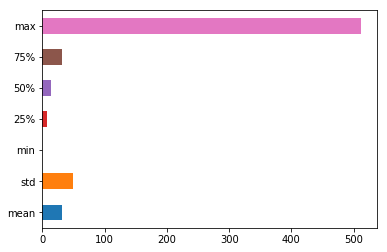

In [50]:
data.Fare.describe().drop('count').plot(kind = 'barh')

plt.show()

In [51]:
high_fare = []
mid_fare = []
low_fare = []


for fare in data.Fare:
    if int(fare) >= 100:
        high_fare.append(int(fare))
    elif int(fare) <100 and int(fare)>=50:
        mid_fare.append(int(fare))
    else:
        low_fare.append(int(fare))
        
print('High fares: ', sorted(high_fare),'\n')
print('Mid fares: ',sorted(mid_fare),'\n')
print('Low fares: ',sorted(low_fare))

High fares:  [106, 106, 108, 108, 110, 110, 110, 110, 113, 113, 113, 120, 120, 120, 120, 133, 133, 134, 134, 135, 135, 135, 146, 146, 151, 151, 151, 151, 153, 153, 153, 164, 164, 211, 211, 211, 211, 221, 227, 227, 227, 227, 247, 247, 262, 262, 263, 263, 263, 263, 512, 512, 512] 

Mid fares:  [50, 50, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 59, 61, 61, 61, 63, 65, 65, 66, 66, 69, 69, 69, 69, 69, 69, 69, 69, 69, 71, 71, 71, 73, 73, 73, 73, 73, 75, 76, 76, 76, 76, 77, 77, 77, 77, 77, 78, 78, 78, 78, 79, 79, 79, 79, 79, 79, 79, 80, 80, 81, 82, 82, 83, 83, 83, 83, 83, 86, 86, 86, 89, 89, 90, 90, 90, 90, 91, 91, 93, 93] 

Low fares:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7

In [52]:
len(high_fare)

53

In [53]:
len(mid_fare)

108

In [54]:
len(low_fare)

730

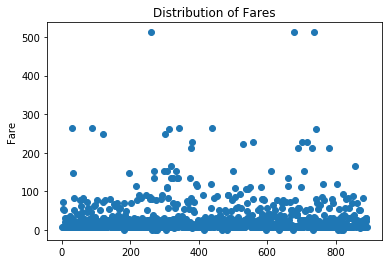

In [80]:
### The Complete distribution of Fares

plt.scatter(data.index,data.Fare)
plt.ylabel('Fare')
plt.title('Distribution of Fares')

plt.show()

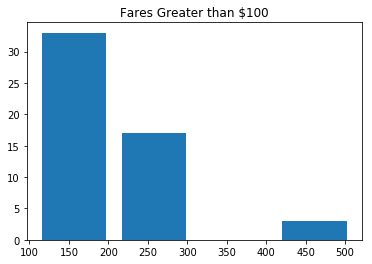

In [56]:
# Fares Greater than 100

plt.hist(high_fare,bins=4,rwidth=0.8)
plt.title('Fares Greater than $100')

plt.show()

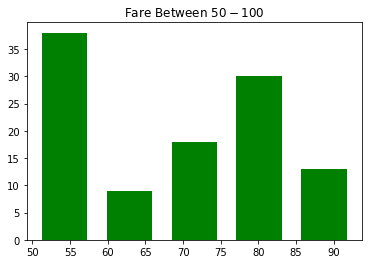

In [57]:
# fares between 50 and 100

plt.hist(mid_fare,bins = 5,rwidth=0.7,color='g')
plt.title('Fare Between $50 - $100')



plt.show()

Text(0.5,1,'Fares less than $50')

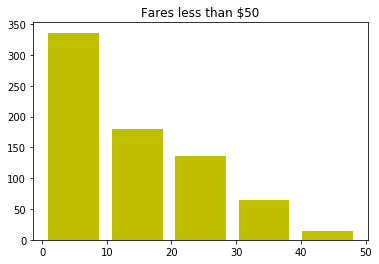

In [58]:
# Fares lessthan 50

plt.hist(low_fare,bins =5,rwidth=0.8,color='y')

plt.title('Fares less than $50')

In [59]:
## Add data to a new column called New Fare

data['New_fare'] = high_fare + mid_fare + low_fare

In [60]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'New_fare'],
      dtype='object')

In [61]:
## Corresponding values are not assigned, therefore, drop the new_fare series

data.drop('New_fare',axis='columns',inplace=True)

In [62]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Survival based on Fare

In [63]:
# Number of Pepole Survived and died who paid Over $100

high = data[data.Fare>=100].Survived.value_counts()
print(high)

1    39
0    14
Name: Survived, dtype: int64


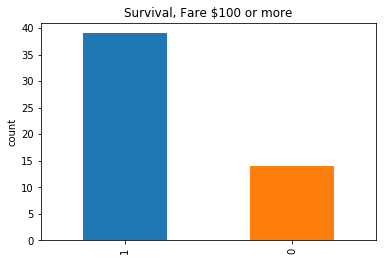

In [81]:
high.plot(kind='bar')

plt.title('Survival, Fare $100 or more')
plt.ylabel('count')

plt.show()

In [113]:
# Prercentage of people who Survived vs died who paid over $100

high = data[data.Fare>=100].Survived.value_counts(normalize=True)
print(high)

1    0.74
0    0.26
Name: Survived, dtype: float64


In [114]:
# Survival of People who paid between $50 and $100

mid = data[(data.Fare<100) & (data.Fare>=50)].Survived.value_counts()
print(mid)

1    70
0    38
Name: Survived, dtype: int64


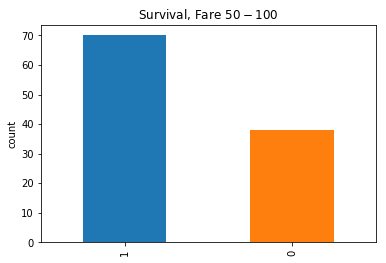

In [115]:
mid.plot(kind='bar')


plt.title('Survival, Fare $50 - $100')
plt.ylabel('count')

plt.show()

In [116]:
# Percentage of people who paid a mid_fare died vs Survived. 


mid = data[(data.Fare<100) & (data.Fare>=50)].Survived.value_counts(normalize=True)
print(mid)

1    0.65
0    0.35
Name: Survived, dtype: float64


In [67]:
# Survival of People who paid lessthan 50

low = data[data.Fare<50].Survived.value_counts()
print(low)

0    497
1    233
Name: Survived, dtype: int64


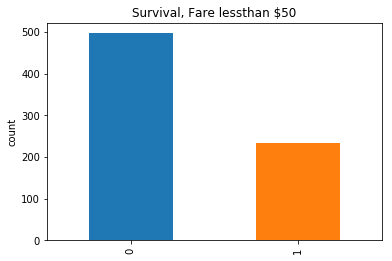

In [68]:
low.plot(kind='bar')


plt.title('Survival, Fare lessthan $50')
plt.ylabel('count')

plt.show()

In [118]:
# Percentage of People who Survived vs Dies who paid Less than $50

low = data[data.Fare<50].Survived.value_counts(normalize = True)
print(low)

0    0.68
1    0.32
Name: Survived, dtype: float64


#### Graph showing the survival based on Fare

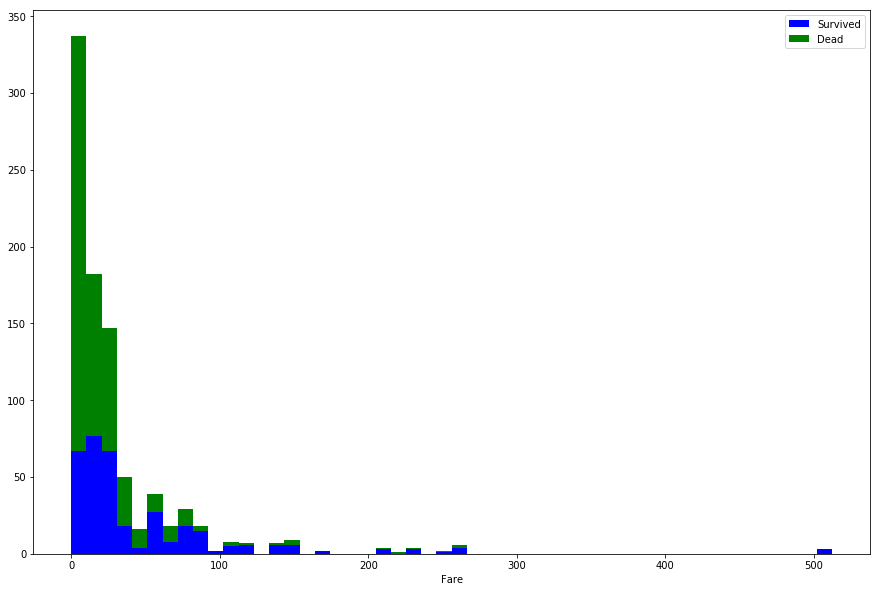

In [119]:
plt.figure(figsize=(15,10))

plt.hist([data[data['Survived']== 1]['Fare'],data[data['Survived']==0]['Fare']],
         stacked = True,color=['b','g'],bins=50,label = ['Survived','Dead'])

plt.xlabel('Fare')
plt.legend()


plt.show()

- There seems to be a clear relationship between the Fare and the Survival, As we can see people who paid high Fares had a greater chance of Survival. 

- Based on the data people who paid over $50 had a high probability of survival.

### Fare vs Class

In [69]:
# Class of people who paid over $100

data[data.Fare>=100].Pclass.value_counts()

1    53
Name: Pclass, dtype: int64

In [70]:
# Class of people who paid between $50 and $ 100

data[((data.Fare<100) & (data.Fare>=50))].Pclass.value_counts()

1    87
3    14
2     7
Name: Pclass, dtype: int64

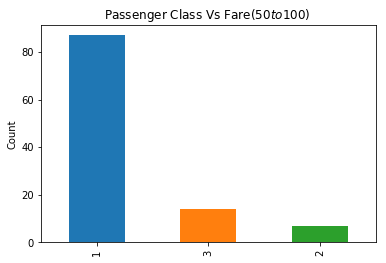

In [120]:
data[((data.Fare<100) & (data.Fare>=50))].Pclass.value_counts().plot(kind='bar')


plt.ylabel('Count')
plt.title('Passenger Class Vs Fare($50 to $100) ')




plt.show()

In [72]:
# Class of people who paid less than $50

data[data.Fare<50].Pclass.value_counts()

3    477
2    177
1     76
Name: Pclass, dtype: int64

In [189]:
data[data.Fare<50].Pclass.value_counts(normalize = True)

3    0.65
2    0.24
1    0.10
Name: Pclass, dtype: float64

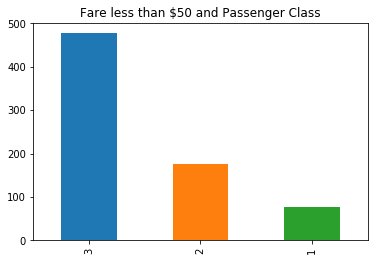

In [73]:
data[data['Fare']<50].Pclass.value_counts().plot(kind='bar')

plt.title('Fare less than $50 and Passenger Class')


plt.show()

#### The Fare prices of the Titanic seems extremely varied (especially for first class tickets)

- 10% of less than $50 tickets were First class. 

- Some have paid over $500 to get First class.

- Majority of people in First class paid between 50 and 100

- Interestingly a majority of people in second class paid less than $50

![alt text](Classes.png 'Titanic Classes')

The reason for the extreme variations of the Fare prices (especially for First class),can be explained by looking at this image. As we can see in the image, majority of the ship's space is alocated to accomadate First Class. And ther are rooms close to the top deck as well as rooms few floors below top deck. This could be one reason for the skewed first class ticket prices. Another reason could be the number of free tickets given fo first class.  

### Class vs Survival

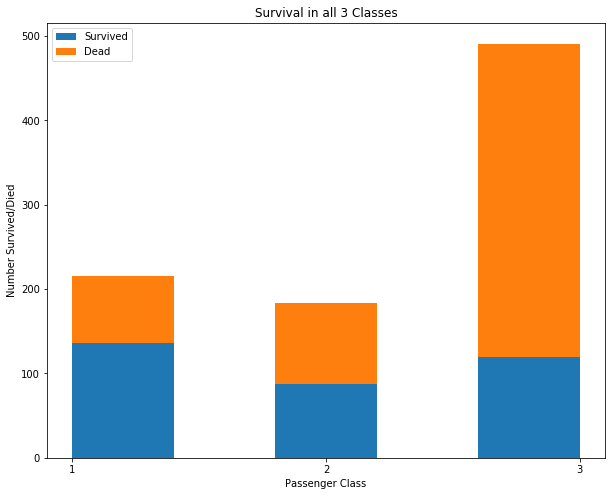

In [172]:
x_nums = np.linspace(1,3,3)

plt.figure(figsize=(10,8))
plt.hist([data[data['Survived']==1]['Pclass'],data[data['Survived']==0]['Pclass']],
         stacked =True,bins =5,label=['Survived','Dead'])

plt.title('Survival in all 3 Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Number Survived/Died')
plt.xticks(x_nums)
plt.legend()



plt.show()

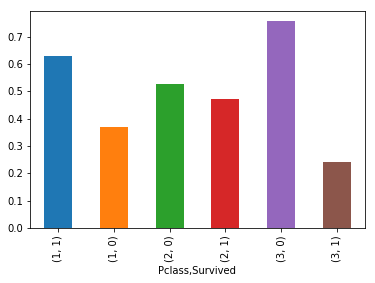

In [188]:
# Percentages of people died vs Survived in different Classes. 

data.groupby(data.Pclass).Survived.value_counts(normalize=True).plot(kind='bar')


plt.show()

Over 70% of the people in Third class have died while the number is only 30% for First class. 

([array([ 81.,   0.,   0., 233.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,  94.,   0.,   0.,  76.,   0.,   0., 144.]),
  array([468.,   0.,   0., 109.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0., 122.,   0.,   0., 108.,   0.,   0., 347.])],
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 4 Lists of Patches objects>)

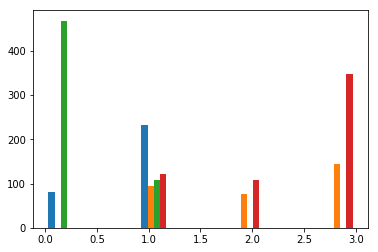

In [207]:
plt.hist([data[data['Sex'] == 'female']['Survived'],data[data['Sex']=='female']['Pclass'],
         data[data['Sex'] == 'male']['Survived'],data[data['Sex']=='male']['Pclass']])

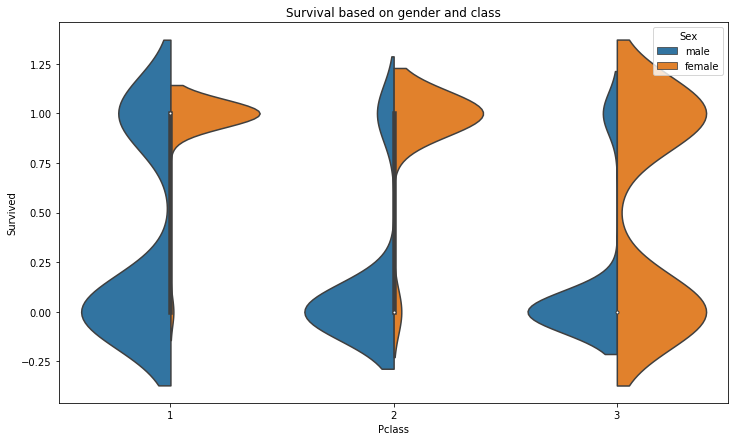

In [236]:
## Violin plot to show the Survival of gender and Class

fig = plt.figure(figsize=(12,7))

plt.title('Survival based on gender and class')
fig = sns.violinplot(x='Pclass',y='Survived',hue='Sex',data=data,split=True,scale='width')


- Clearly more males survived in 1st class than any other class. 
- Chance of survival fo female in first class seems to be extremely high
- Chance of survival for females is similar in second class
- The split in 3rd class for women seems to be pretty even, while males in 3rd class had a very slim chance of survival. 

## Cabin

try to guess the cabin......... check the picture 

In [75]:
data.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [76]:
###### The Image of Cabin Locations

In [77]:
data.Cabin.isna().sum()

687

In [78]:
data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [243]:
data.groupby(data.Cabin).Survived.value_counts().sum()

204